In [1]:
#non quantized model

# from vllm import LLM,SamplingParams
# llm = LLM(path_model,max_model_len=1024)

# sampling_params = SamplingParams(
#             temperature=0.7,
#             top_p=1,
#             max_tokens=512,
#             presence_penalty=1.15,
#         )

# to try

## airoboros filtering
https://github.com/jondurbin/airoboros/blob/main/airoboros/instructors/prompts/filter.txt

In [50]:
airoboros = """Below is an instruction, and a response to the instruction.

Read the instruction closely, then examine the response.

Details to pay attention to:
- did the response follow the instruction precisely?
- was the response correct?
- is the code complete and accurate, and does it provide the exact functionality requested?
- was the response written in an intelligent, interesting way?

With those details in mind, please silently rank the response with a score between 0 and 100, with 100 being the best.

If the response included any sort of warning or disclaimer, or it was a refusal to answer, be sure to give it a score of 0.

If the response indicates in any way that it was written by an AI assistant, or indicates it doesn't have opinions, senses, emotions, etc., give it a score of 0.

If the score is {threshold} or above, output a single word "GOOD", otherwise output a single word "BAD"

INSTRUCTION:
{instruction}

RESPONSE:
{response}
"""



# teknium/carper 
https://x.com/Teknium1/status/1748041953567215709?s=20

In [13]:
"""Below is an instruction, and a response to the instruction.

Read the instruction closely, then examine the response.

Details to pay attention to:
- did the response follow the instruction precisely?
- was the 
- is the code complete and accurate, and does it provide the exact functionality requested?
- was the function g interse?

"""
"""
Not educational, Somewhat Educational, Highly Educational"""

'\nNot educational, Somewhat Educational, Highly Educational'

In [14]:
"""
Not educational, Somewhat Educational, Highly Educational"""

'\nNot educational, Somewhat Educational, Highly Educational'

In [1]:
from utils_test_puzzle import prompt_instruction,puzzle_dict
import matplotlib.pyplot as plt
import numpy as np
import torch
from compute_rank import Auto_j_Rank,Yes_model
import pandas as pd
import math

    # left puzzle tested against top puzzle

## utils

In [ ]:
def plot_pairwise_comparison_results(save_results):
    # Create an empty grid dataframe
    grid = pd.DataFrame(index=puzzle_dict.keys(), columns=puzzle_dict.keys())
    # Fill the grid with pairwise comparison results
    for key1, key2, res_pairwise in save_results:
        if math.isnan(grid.loc[key1, key2]):
            grid.loc[key1, key2] = 0
        if math.isnan(grid.loc[key2, key1]):
            grid.loc[key2, key1] = 0
        if res_pairwise == 0:
            grid.loc[key1, key2] += 1#'Win'
            grid.loc[key2, key1] += 0#'Loss'
        elif res_pairwise == 1:
            grid.loc[key1, key2] += 0#'Loss'
            grid.loc[key2, key1] += 1#'Win'
        elif res_pairwise == 2:
            grid.loc[key1, key2] += 0.5#'Draw'
            grid.loc[key2, key1] += 0.5#'Draw'

    order=grid.sum().sort_values(ascending=True).index
    grid_order=grid.loc[order, order]
    grid_order=grid_order.to_numpy()
    grid_order= np.nan_to_num(grid_order)
    grid_order = np.array(grid_order, dtype=float)
    plt.imshow(grid_order, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title('Pairwise comparison results')
    plt.xlabel('Puzzle index')
    plt.ylabel('Puzzle index')
    # plot keys
    plt.xticks(np.arange(len(order)), order, rotation=60, ha='right')
    plt.yticks(np.arange(len(order)), order)
    for i in range(len(order)):
        for j in range(len(order)):
            plt.annotate(str(grid_order[i, j]), xy=(j, i), ha='center', va='center', color='white')

    plt.show()

## Auto-J

### Pairwise

In [2]:
Rank=Auto_j_Rank(puzzle_dict,mode_rank="pairwise",prompt_instruction=prompt_instruction)
ranked_puzzles, win_record = Rank.computing_ranking()
speed_llama2 = Rank.list_speed_inference
save_results = Rank.save_results
save_results_inverse = Rank.save_results_inverse
print(torch.mean(torch.tensor(speed_llama2)))

You passed `quantization_config` to `from_pretrained` but the model you're loading already has a `quantization_config` attribute and has already quantized weights. However, loading attributes (e.g. ['use_cuda_fp16', 'use_exllama', 'max_input_length', 'exllama_config', 'disable_exllama']) will be overwritten with the one you passed to `from_pretrained`. The rest will be ignored.
Speed Inference: 113.3962327327453 tok/s: 100%|██████████| 112/112 [49:13<00:00, 26.37s/it] 

tensor(90.6846)


In [20]:
save_all_res = Rank.save_all_results

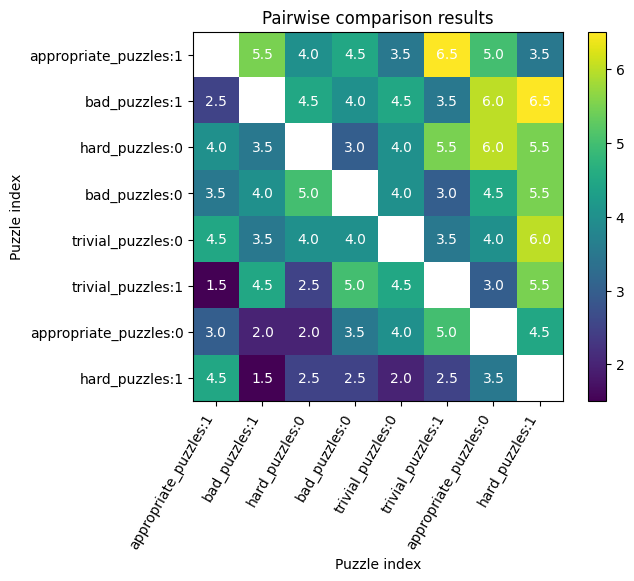

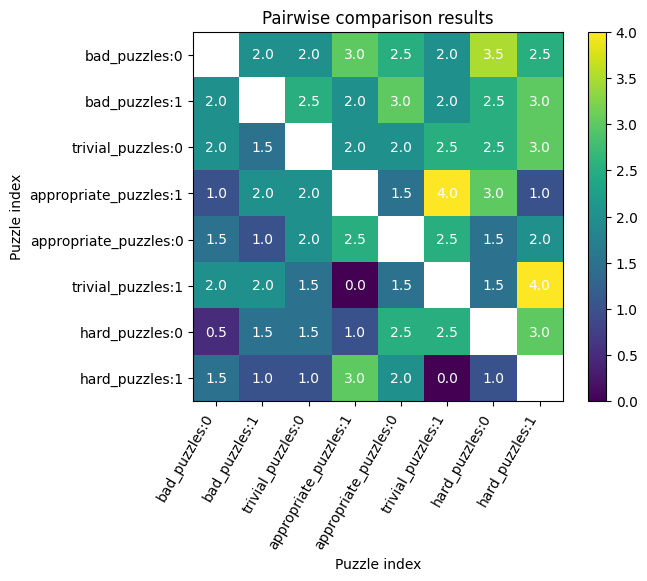

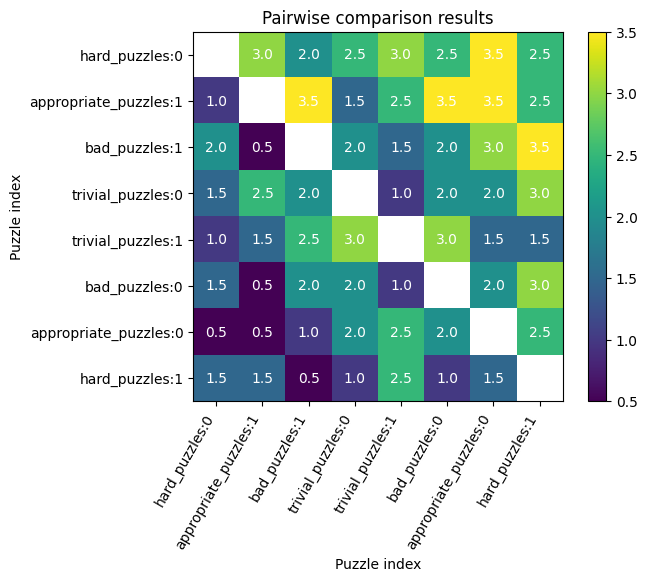

In [21]:
plot_pairwise_comparison_results(save_all_res) 
plot_pairwise_comparison_results(save_results)
plot_pairwise_comparison_results(save_results_inverse) # test position bias in the pairwise comparison

# absolute

In [ ]:
Rank=Auto_j_Rank(puzzle_dict,mode_rank="absolute",prompt_instruction=prompt_instruction,exllama2=True)
ranked_keys, grades = Rank.computing_ranking()

In [3]:
sorted(grades, key=grades.get, reverse=True)

['appropriate_puzzles:0',
 'appropriate_puzzles:1',
 'hard_puzzles:0',
 'bad_puzzles:1',
 'hard_puzzles:1',
 'trivial_puzzles:1',
 'trivial_puzzles:0',
 'bad_puzzles:0']

In [4]:
grades

{'bad_puzzles:0': [2.0, 3.0, 3.0, 2.0],
 'bad_puzzles:1': [3.0, 3.0, 2.0, 3.0],
 'trivial_puzzles:0': [2.0, 3.0, 3.0, 3.0],
 'trivial_puzzles:1': [3.0, 2.0, 3.0, 3.0],
 'appropriate_puzzles:0': [3.0, 3.0, 3.0, 3.0],
 'appropriate_puzzles:1': [3.0, 3.0, 3.0, 3.0],
 'hard_puzzles:0': [3.0, 3.0, 3.0, 3.0],
 'hard_puzzles:1': [3.0, 3.0, 2.0, 3.0]}

# YES model (absolute)


In [2]:
path_model ="/home/flowers/work/hf/deepseek-coder-1.3b-instruct"
yes_mode_list= ["finetuning","education"]
yes = Yes_model(puzzle_dict,model_id=path_model,yes_mode="education",exllama2=False)
ranked_keys, grades = yes.absolute_ranking()
sorted_grades=sorted(grades, key=grades.get, reverse=True)
grades_puzzles = {}
for i in sorted_grades:
    grades_puzzles[i]=grades[i][0]
grades_puzzles

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/home/flowers/miniconda3/envs/inference/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Speed Inference: 3368.5953401514125 tok/s: 100%|██████████| 8/8 [00:00<00:00, 11.55it/s]


{'appropriate_puzzles:1': 0.7482712864875793,
 'trivial_puzzles:0': 0.7440441250801086,
 'trivial_puzzles:1': 0.7153483033180237,
 'appropriate_puzzles:0': 0.6737751960754395,
 'bad_puzzles:0': 0.6499994397163391,
 'bad_puzzles:1': 0.6009151339530945,
 'hard_puzzles:1': 0.49674391746520996,
 'hard_puzzles:0': 0.4277363121509552}

In [3]:
yes.yes_mode="finetuning"
ranked_keys, grades = yes.absolute_ranking()
sorted_grades=sorted(grades, key=grades.get, reverse=True)
grades_puzzles = {}
for i in sorted_grades:
    grades_puzzles[i]=grades[i][0]
grades_puzzles

Speed Inference: 3743.6908715317686 tok/s: 100%|██████████| 8/8 [00:00<00:00, 13.60it/s]


{'trivial_puzzles:0': 0.7853195667266846,
 'appropriate_puzzles:1': 0.7636772394180298,
 'trivial_puzzles:1': 0.7533575892448425,
 'appropriate_puzzles:0': 0.7315734624862671,
 'bad_puzzles:0': 0.711808979511261,
 'bad_puzzles:1': 0.6334743499755859,
 'hard_puzzles:1': 0.5515023469924927,
 'hard_puzzles:0': 0.5247721076011658}

# generate COT prometheus criterion

In [5]:
crit_1 = """[Does the model guarantee universal suitability and prevent logical inconsistencies in its reasoning methodology for a directive that necessitates a stepwise logical progression? This entails addressing edge cases in programming and mathematical issues, and ensuring there are no counterexamples.]

Score rubrics 1:
Score 1: The rationality of the model's response is entirely nonsensical.
Score 2: The model's response is riddled with significant logical inaccuracies or mistakes.
Score 3: The model's response has a few logical discrepancies or errors, though they are not of major concern.
Score 4: The model's response is logically valid, but some edge cases are overlooked.
Score 5: The model's response is flawless in terms of logic and considers all possible edge cases.
"""
crit_2 = """
[Does the language model adapt its communication style based on the user's needs, such as technical level, language proficiency, and emotional state?]

Score rubrics 2:
Score 1: The language model makes no attempt to adapt its communication style to the user's needs.
Score 2: The language model makes minor adjustments to its communication style, but these are largely ineffective or inappropriate.
Score 3: The language model shows some level of adaptation to the user's needs, but there are still areas of mismatch.
Score 4: The language model adapts its communication style well, with only minor inconsistencies or areas of mismatch.
Score 5: The language model perfectly adapts its communication style to the user's needs, demonstrating a high level of understanding and empathy.
"""
crit_3 = """[Does the central idea or concept of the response stand out as being fresh or innovative?]
Score rubrics 3:
Score 1: The central concept is clichéd and has been explored repeatedly in other works.
Score 2: The central concept has a familiar base but attempts a slightly different angle or twist.
Score 3: The central concept is somewhat original, blending familiar and new elements.
Score 4: The central concept is largely innovative, with just a hint of familiarity.
Score 5: The central concept is groundbreaking, offering a completely fresh perspective.
"""

In [17]:
about_new_criteria="""This new criteria and scoring rubrics are designed to evaluate a Python programming puzzle generated by a models.
A Python programming puzzle is defined by two functions, the puzzle f(…) and the solution g(…). f defines an algorithmic challenge, and g solves this challenge. g is a solution to f if and only if f(g()) == True. There can be additional optional keyword arguments to both f and g; these arguments, if they exist, are the same for both functions.

Te puzzle have the following structure:

def f(solution, args=...) -> bool:
    # Python code to test the solution returned by g.
    # This function behaves like a unit test and must return True if the solution is correct, False otherwise.

def g(args=...) -> solution:
    # Python code to generate a solution for the problem.
    # The solution should generalize to all possible args.
    return solution

The evaluation critera for good puzzles are:

Clarity (how easy is it to understand what needs to be done?);
Opportunity for learning (how likely is it that a student will learn by trying to solve the puzzle and looking at its solution?);
Difficulty appropriate fior the course (is the puzzle too easy. tooo hard, or just right?);
Engagement (is the puzzle fun or boring?);
"""

In [18]:
new_criteria="""We are brainstorming criteria with which to grade a language model on its responses in
diverse situations.
A ‘criteria‘ is some useful, real-world objective, and associated rubric for scores 1-5, that
tests a capability.
Here you will see 4 examples of ‘criteria‘, and their scoring rubrics, formatted as
JSON.
Criteria 1:
{JSON LIST 1}
Criteria 2:
{JSON LIST 2}
Criteria 3:
{JSON LIST 3}
Criteria 4:
{JSON LIST 4}
Please brainstorm a new criteria and scoring rubrics.
Be creative and create new but useful criteria that people in different settings or industries
might find practical.
Please format the output as same as the above examples with no extra or surrounding text.

New Criteria:
"""
new_criteria_3="""We are brainstorming criteria with which to grade a language model on its responses in
diverse situations.
A Criteria is some useful, real-world objective, and associated rubric for scores 1-5, that
tests a capability.
Here you will see 3 examples of ‘criteria‘, and their scoring rubrics.
Criteria 1:
{crit_1}
Criteria 2:
{crit_2}
Criteria 3:
{crit_3}
Please brainstorm a new criteria and scoring rubrics.
Be creative and create new but useful criteria that people in different settings or industries
might find practical.
Please format the output as same as the above examples.
{about_new_criteria}
New Criteria:
"""

ask_gpt=new_criteria_3.format(crit_1=crit_1,crit_2=crit_2,crit_3=crit_3,about_new_criteria=about_new_criteria)
print(ask_gpt)

We are brainstorming criteria with which to grade a language model on its responses in
diverse situations.
A Criteria is some useful, real-world objective, and associated rubric for scores 1-5, that
tests a capability.
Here you will see 3 examples of ‘criteria‘, and their scoring rubrics.
Criteria 1:
[Does the model guarantee universal suitability and prevent logical inconsistencies in its reasoning methodology for a directive that necessitates a stepwise logical progression? This entails addressing edge cases in programming and mathematical issues, and ensuring there are no counterexamples.]

Score rubrics 1:
Score 1: The rationality of the model's response is entirely nonsensical.
Score 2: The model's response is riddled with significant logical inaccuracies or mistakes.
Score 3: The model's response has a few logical discrepancies or errors, though they are not of major concern.
Score 4: The model's response is logically valid, but some edge cases are overlooked.
Score 5: The model'

## test prometheus

In [3]:
prometheus_1="""[Is the Python programming puzzle effectively designed and solvable, with the solution function correctly addressing the algorithmic challenge posed by the puzzle function?]

Score rubrics:
Score 1: The puzzle (f) and solution (g) functions are fundamentally flawed, either due to incorrect logic, making the puzzle unsolvable, or because the solution does not correctly solve the intended challenge.
Score 2: The puzzle is solvable, but the solution is inefficient or partially incorrect, solving the puzzle only under specific conditions or failing to address all potential edge cases.
Score 3: The puzzle is designed well and the solution solves the challenge correctly, but there are minor inefficiencies or lack of optimization in the solution.
Score 4: Both the puzzle and solution are well-designed, with the solution being efficient and correct. However, there might be room for slight improvements in terms of optimization or elegance.
Score 5: The puzzle is ingeniously designed to challenge understanding of specific programming concepts, and the solution is not only correct but also optimized and elegant, showcasing deep algorithmic understanding and creativity.
"""

prometheus_2= """Criteria:
[How effectively does the Python programming puzzle balance complexity and accessibility to foster problem-solving skills without overwhelming the solver? This includes the clarity of the puzzle's description, the creativity and relevance of the problem, and the educational value in terms of programming concepts and logic application.]

Score rubrics:
Score 1: The puzzle is either overly simplistic or impossibly complex, with unclear instructions that confuse rather than guide the solver. It lacks educational value and fails to engage.
Score 2: The puzzle presents a somewhat clear challenge but falls short in balancing complexity with accessibility. It offers limited educational value and engages the solver to a small extent.
Score 3: The puzzle has a clear set of instructions and is moderately challenging. It introduces relevant programming concepts and logic application, providing a fair educational value and engagement.
Score 4: The puzzle is well-crafted with clear, concise instructions and a cleverly balanced level of complexity. It is engaging and significantly contributes to the solver's understanding of key programming concepts and logic.
Score 5: The puzzle exemplifies an ideal balance of complexity and accessibility, with crystal-clear instructions and a highly relevant, innovative challenge. It maximizes educational value, thoroughly engages the solver, and enhances problem-solving skills in a fun and meaningful way."""

prometheus_2_1 ="""Criteria:
[Is the language model capable of creating Python programming puzzles that are not only innovative but also educational, striking a balance between challenge and learnability?]

This criterion evaluates the model's ability to generate Python programming puzzles (including both the puzzle f(…) and its solution g(…)), assessing them based on their clarity, potential for learning, appropriateness of difficulty, and level of engagement. The goal is to measure the effectiveness of puzzles as educational tools that can stimulate interest and understanding in Python programming.

Score rubrics:

Score 1: The puzzle is confusing, offers no clear learning outcomes, is either too simplistic or excessively complex, and fails to engage or interest the user.

Clarity: The instructions and objectives of the puzzle are unclear or misleading.
Opportunity for learning: The puzzle does not introduce any new concepts or reinforce existing knowledge in a meaningful way.
Difficulty: The puzzle is either too easy, offering no challenge, or too difficult, making it inaccessible for the intended audience.
Engagement: The puzzle is dull or frustrating, with no elements designed to spark interest or curiosity.
Score 2: The puzzle has some elements of clarity and educational value but falls short in difficulty balance and engagement.

Clarity: The puzzle's instructions are somewhat understandable, but key details may be vague or ambiguous.
Opportunity for learning: The puzzle introduces or reinforces programming concepts, but these are not well-integrated into the challenge.
Difficulty: The puzzle's difficulty is inconsistent, with parts that are either too easy or too hard relative to the intended learning outcomes.
Engagement: The puzzle offers minimal elements of fun or intrigue, but these are not enough to sustain interest.
Score 3: The puzzle is adequately clear, provides a fair learning opportunity, is appropriately challenging for its target audience, and has some engaging elements.

Clarity: The puzzle's instructions and goals are clear, with minor areas of ambiguity.
Opportunity for learning: The puzzle offers a good learning opportunity by introducing new concepts or reinforcing existing ones in a context that requires application.
Difficulty: The puzzle is designed with an appropriate level of difficulty, challenging enough to be educational without being discouraging.
Engagement: The puzzle is somewhat engaging, with elements that can capture and hold the user's interest to a reasonable degree.
Score 4: The puzzle is clear, highly educational, has a well-balanced level of difficulty, and is engaging.

Clarity: The puzzle's instructions and objectives are very clear and concise, making it easy to understand what is required.
Opportunity for learning: The puzzle effectively introduces or reinforces important programming concepts in a way that enhances understanding and skills.
Difficulty: The puzzle's difficulty is well-calibrated, providing a challenge that is neither too easy nor too hard, encouraging deep engagement with the material.
Engagement: The puzzle is engaging and enjoyable, with creative elements that stimulate interest and motivation to solve.
Score 5: The puzzle is exemplary in clarity, offers outstanding educational value, perfectly matches the difficulty level for its audience, and is highly engaging and enjoyable.

Clarity: The puzzle's instructions and objectives are perfectly articulated, leaving no room for misinterpretation or confusion.
Opportunity for learning: The puzzle is a superior educational tool, offering deep insights into programming concepts and techniques, and encouraging critical thinking and problem-solving skills.
Difficulty: The puzzle strikes an ideal balance, presenting a challenge that is precisely aligned with the intended learning outcomes and audience's abilities.
Engagement: The puzzle is exceptionally engaging, with innovative and fun elements that greatly enhance the learning experience, making it both memorable and effective.

"""

In [4]:
from compute_rank import instruction_prometheus
print(instruction_prometheus)

###Task Description:
An instruction, a response to evaluate and a score rubric representing a evaluation criteria are given.
1. Write a detailed feedback that assess the quality of the response strictly based on the given score rubric, not evaluating in general.
2. After writing a feedback, write a score that is an integer between 1 and 5. You should refer to the score rubric.
3. The output format should look as follows: "Feedback: (write a feedback for criteria) [RESULT] (an integer number between 1 and 5)"
4. Please do not generate any other opening, closing, and explanations.

###The instruction to evaluate:
{orig_instruction}

###Response to evaluate:
{orig_response}

###Score Rubrics:
{Criteria}

###Feedback:



In [5]:
base_persona ="You are a Professor teaching a programming course in Python. "
base_persona += "You want to give some Python Programming Puzzles to your master's student in CS to improve their level in Python. " # student -> Master student
prompt_instruction = base_persona 
prompt_instruction += """Python Programming Puzzles (P3) consists of two functions: a problem function `f` and its corresponding solution `g`. The challenge lies in solving a challenging SAT problem `f` with a function `g` such that `f(g())` evaluates to `True`.

Rules:
- f and g should be distinct (the solution `g` should not be a copy-paste of `f`)
- Make sure the problem is challenging enough for master's students in CS

```python
def f(solution, args=...) -> bool:
    # Python code to test the solution returned by g.
    # This function is a test unit and must return True if the solution is correct, False otherwise.

def g(args=...) -> solution:
    # Python code to generate a solution for the problem.
    # The solution should generalize to all possible args.
    return solution

assert f(g()) == True
```
Your Task:
Create a new Python Programming Puzzle that is challenging and educational for master's students in CS."""

In [6]:
instruction="""you are an unbiased evaluator of Python Programming Puzzles.
Python Programming Puzzles (P3) consists of two functions: a problem function `f` and its corresponding solution `g`. The challenge lies in solving a challenging SAT problem `f` with a function `g` such that `f(g())` evaluates to `True`.
Rules:
- f and g should be distinct (the solution `g` should be different from `f`, for educational purposes)
- Make sure the problem and solution is challenging enough for master's students in CS

You are tasked with evaluating a puzzle based on its complexity value.
You need to tell me if the model response is "Not complex", "easy","Somewhat complex" or "Highly complex" for a master's student in Computer Science.
"""
print(instruction)

you are an unbiased evaluator of Python Programming Puzzles.
Python Programming Puzzles (P3) consists of two functions: a problem function `f` and its corresponding solution `g`. The challenge lies in solving a challenging SAT problem `f` with a function `g` such that `f(g())` evaluates to `True`.
Rules:
- f and g should be distinct (the solution `g` should be different from `f`, for educational purposes)
- Make sure the problem and solution is challenging enough for master's students in CS

You are tasked with evaluating a puzzle based on its complexity value.
You need to tell me if the model response is "Not complex", "easy","Somewhat complex" or "Highly complex" for a master's student in Computer Science.



In [7]:
my_eval="""Below is an instruction, and a response to the instruction.

Read the instruction closely, then examine the response (Problem and Solution).

INSTRUCTION:
{instruction}

RESPONSE:
{response}
"""
"""
Not educational, Somewhat Educational, Highly Educational"""

'\nNot educational, Somewhat Educational, Highly Educational'

In [8]:
import sys 
sys.path.append("/home/flowers/work/OpenELM")
from openai import OpenAI
from key import OPENAI_API_KEY
from utils_openai import get_completion
cfg: dict = {
"temperature": 0.,
# "top_p": 1.,
# TODO: rename config option?
"model": "gpt-3.5-turbo-0125",
"logprobs": True,
"top_logprobs": 5,
"max_tokens": 200,
}
max_retries=10
timeout=30
client = OpenAI(api_key=OPENAI_API_KEY,max_retries=max_retries, timeout=timeout)


In [9]:
puz_list=[#n_correct 1 /5
"""
Puzzle description: The puzzle requires the student to define a function that generates a list of numbers based on given parameters, and then check if the generated list satisfies certain conditions.
from typing import List 
def f(x: List[int], a=43536, s=3795, e=417606) -> bool:
    return x[0] == a and x[-1] <= e and (x[-1] + s > e) and all([x[i] + s == x[i + 1] for i in range(len(x) - 1)])
def g(a = 43536, s = 3795, e = 417606):
    return list(range(a, e + 1, s))
assert f(g()) == True
""",
#n_correct 3 /5

"""
The puzzle involves finding a missing number in a list of integers by calculating the sum of the list and comparing it to the expected sum of a sequence of numbers.

from typing import List

def f(missing_num: int, nums=[1, 2, 3, 4, 6, 7, 8, 9]) -> bool:
    n = len(nums) + 1
    total_sum = n * (n + 1) // 2
    return missing_num == total_sum - sum(nums)

def g(nums=[1, 2, 3, 4, 6, 7, 8, 9]) -> int:
    n = len(nums) + 1
    total_sum = n * (n + 1) // 2
    return total_sum - sum(nums)

assert f(g()) == True
""",
#difficulty 3 /5

"""
The puzzle requires the student to create a string expression using only the characters '1', '8', '-', '+', '*', and '/' that evaluates to 63 and contains three occurrences of the digit '8' and one occurrence of the digit '1'.
def f(s: str) -> bool:
    return set(s) <= set('18-+*/') and s.count('8') == 3 and (s.count('1') == 1) and (eval(s) == 63)
def g():
    return "8*8-1**8"
assert f(g()) == True
"""
          
          ]

In [10]:
orig_instruction=prompt_instruction
orig_response= puz_list[2]
Criteria = prometheus_2
prompt = instruction_prometheus.format(orig_instruction=orig_instruction,orig_response=orig_response,Criteria=Criteria)
# print(prompt)

In [11]:
from utils_test_puzzle import puzzle_dict

In [12]:
name_puz,puzzle = list(puzzle_dict.items())[0]
puzzle_format = puzzle.replace("```python","").replace("```","")
puzzle_format = "Problem:" + puzzle_format.split("def g")[0]+ "Solution: \n" + "def g"+puzzle_format.split("def g")[1]
print(name_puz, puzzle_format)

bad_puzzles:0 Problem:
def f(is_sorted: bool, arr: List[int]) -> bool:
    return is_sorted == all((arr[i] <= arr[i + 1] for i in range(len(arr) - 1)))

Solution: 
def g(arr: List[int]) -> bool:
    return all((arr[i] <= arr[i + 1] for i in range(len(arr) - 1)))



In [132]:
# prompt = airoboros.format(instruction=prompt_instruction, response=puzzle_format,threshold=90)
prompt = my_eval.format(instruction=instruction,response=puzzle_format)

out=get_completion(client,prompt, cfg,temperature=0.)
print(out)


Based on the given problem and solution, I would rate this as "Somewhat complex" for a master's student in Computer Science. The problem involves checking if an array is sorted, which requires understanding of list comprehension and boolean logic. The solution provided requires knowledge of iterating over arrays and using list comprehension to check for sorting. It is not overly complex but still requires a good understanding of Python programming concepts.


In [124]:
print(prompt)

Below is an instruction, and a response to the instruction.

Read the instruction closely, then examine the response (Problem and Solution).

INSTRUCTION:
you are an unbiased evaluator of Python Programming Puzzles.
Python Programming Puzzles (P3) consists of two functions: a problem function `f` and its corresponding solution `g`. The challenge lies in solving a challenging SAT problem `f` with a function `g` such that `f(g())` evaluates to `True`.
Rules:
- f and g should be distinct (the solution `g` should be different from `f`, for educational purposes)
- Make sure the problem and solution is challenging enough for master's students in CS

You are tasked with evaluating a puzzle based on its complexity value.
You need to tell me if the model response is "Not complex", "easy","Somewhat complex" or "Highly complex" for a master's student in Computer Science.


RESPONSE:
Problem:
def f(st: str, a="world", b="Hello world"):
    return st + a == b

Solution: 
def g(a="world", b="Hello w

In [42]:
from pairrm import RankingSimilarity


S = [1, 2, 3,4,5,6,7,8,9,10]

T = [1, 2, 3,5,4,6,7,8,10,11]

RankingSimilarity(S, T).rbo(p=0.9)


0.6244393860099999